<h1><center>PUC MG - Pontifícia Universidade Católica de Minas Gerais</center></h1>
<h3><center>TRABALHO DE CONCLUSÃO DE CURSO</center><br>
<h2><center>Pós-Graduação em Ciência de Dados e Big Data</center></h2>

<h3><center>JULHO de 2021</center><br>
<br>
TÍTULO: Modelos Preditivos Sobre dados de Microcaps usando séries temporais enriquecidas<br>
<br>
ALUNA: Marli Aparecida Guarino</h3>
<br><br>    


In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [10]:
# pip install scipy

In [3]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [12]:
# Instala o GraphViz, caso ainda não esteja presente:
# pip install GraphViz   -- isto não funciona.
# O que funcionou: no **prompt** (anaconda), rodar 
#     > conda install pydot
#     > conda install python-graphviz

In [4]:
%matplotlib inline

#Biblioteca para ignorar os warnings
import warnings
warnings.filterwarnings("ignore")

#Bibliotecas básicas do python
import numpy as np 
import seaborn as sns
import pandas as pd
from pandas import DataFrame
from pandas.testing import assert_frame_equal
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime
import math

#Bibliotecas para utilização do Prophet
#from fbprophet import Prophet
#from fbprophet.diagnostics import cross_validation, performance_metrics
#from fbprophet.plot import plot_cross_validation_metric

#Bibliotecas para utilização do ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
import pmdarima as pm

#Bibliotecas para utilização do Keras
from keras.models import Sequential
from keras.utils import plot_model
from keras.layers import LSTM, SimpleRNN, Dense, Dropout, Masking, Embedding

#Bibliotecas para utilização das métricas do Sklearn
import sklearn.metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Bibliotecas para uso do statsmodels
import statsmodels.api as sm
from scipy import stats



Using TensorFlow backend.


<h3>CARREGAMENTO E TRATAMENTO DOS DADOS:</h3>

<p>As ações analisadas são: EMBR3 (Embraer), GOAU4 (Gerdau), TAEE11 (Taesa), BPAN4 (Banco Pan) e CYRE3 (Cyrella), além do índice de microcaps SMALL11. 
</p>

In [5]:
# Período total dos dados serem coletados. Posteriormente, serão separados em dados de treinamento ou de teste,
# nas diferentes fases da análise
start_date = '2016-01-01'
end_date =   '2021-07-31'

In [6]:
# Escolha das ações a serem analisadas 
tickers = ['EMBR3.SA', 'GOAU4.SA', 'TAEE11.SA', 'BPAN4.SA', 'CYRE3.SA', 'SMAL11.SA' ]

In [4]:
# Utilização do pandas_datareader para obter os dados que serão utilizados do Yahoo Finance (1/1/2014 a 30/6/2021)
dataset_embr3 = data.DataReader(tickers[0], 'yahoo', start_date, end_date)
dataset_goau4 = data.DataReader(tickers[1], 'yahoo', start_date, end_date)
dataset_taee11 = data.DataReader(tickers[2], 'yahoo', start_date, end_date)
dataset_bpan4 = data.DataReader(tickers[3], 'yahoo', start_date, end_date)
dataset_cyre3 = data.DataReader(tickers[4], 'yahoo', start_date, end_date)
dataset_smal11 = data.DataReader(tickers[5], 'yahoo', start_date, end_date)

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/EMBR3.SA/history?period1=1451631600&period2=1627801199&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

In [ ]:
#Salvando os dados lidos em arquivos .CSV:

dataset_embr3.to_csv("Dados\\embr3_prices.csv")
dataset_goau4.to_csv("Dados\\goau4_prices.csv")
dataset_taee11.to_csv("Dados\\taee11_prices.csv")
dataset_bpan4.to_csv("Dados\\bpan4_prices.csv")
dataset_cyre3.to_csv("Dados\\cyre3_prices.csv")
dataset_smal11.to_csv("Dados\\smal11_prices.csv")

# melb = pd.DataFrame(series, columns=heading )

In [7]:
####################  Caso o Yahoo Service esteja indisponível, ler os dados previamente salvos:  ###########################

dataset_embr3 = pd.read_csv('Dados\\EMBR3.SA.csv', header=0, index_col=0)
dataset_goau4 = pd.read_csv('Dados\\GOAU4.SA.csv',header=0,index_col=0)
dataset_taee11 = pd.read_csv('Dados\\TAEE11.SA.csv', header=0, index_col=0)
dataset_bpan4 = pd.read_csv('Dados\\BPAN4.SA.csv',header=0,index_col=0)
dataset_cyre3 = pd.read_csv('Dados\\CYRE3.SA.csv', header=0, index_col=0)
dataset_smal11 = pd.read_csv('Dados\\SMAL11.SA.csv',header=0,index_col=0)
#############################################################################################################################

In [8]:
dataset_goau4

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,23.580000,23.580000,22.639999,22.950001,20.238739,849700.0
2014-01-03,22.709999,23.020000,22.360001,22.730000,20.044725,570000.0
2014-01-06,22.459999,22.780001,22.280001,22.690001,20.009457,762300.0
2014-01-07,22.750000,22.990000,22.410000,22.549999,19.885990,1065200.0
2014-01-08,22.500000,23.010000,22.350000,22.500000,19.841902,747300.0
...,...,...,...,...,...,...
2021-06-21,13.450000,13.970000,13.290000,13.900000,13.900000,13568600.0
2021-06-22,13.830000,13.900000,13.650000,13.860000,13.860000,12932900.0
2021-06-23,13.830000,13.940000,13.740000,13.780000,13.780000,9456300.0


In [33]:
######### VERIFICANDO SE HÁ VALORES NULOS NOS DADOS OBTIDOS: #####################################################

if dataset_embr3.isnull().sum().any() > 0:
    print ("Dados de embr3  CONTÊM NULOS! ", dataset_embr3[dataset_embr3['Close'].isnull()].index.tolist())
else:
    print ("Dados de embr3 \tnão contêm nulos")
    
if dataset_goau4.isnull().sum().any() > 0:
    print ("Dados de goau4  CONTÊM NULOS! ", dataset_goau4[dataset_goau4['Close'].isnull()].index.tolist())
else:
    print ("Dados de goau4 \tnão contêm nulos")


if dataset_taee11.isnull().sum().any() > 0:
    print ("Dados de taee11 CONTÊM NULOS! ", dataset_taee11[dataset_taee11['Close'].isnull()].index.tolist())
else:
    print ("Dados de taee11\tnão contêm nulos")


if dataset_bpan4.isnull().sum().any() > 0:
    print ("Dados de bpan4  CONTÊM NULOS! ", dataset_bpan4[dataset_bpan4['Close'].isnull()].index.tolist())
else:
    print ("Dados de bpan4 \tnão contêm nulos")


if dataset_cyre3.isnull().sum().any() > 0:
    print ("Dados de cyre3  CONTÊM NULOS! ", dataset_cyre3[dataset_cyre3['Close'].isnull()].index.tolist())
else:
    print ("Dados de cyre3 \tnão contêm nulos")


if dataset_smal11.isnull().sum().any() > 0:
    print ("Dados de smal11 CONTÊM NULOS! ", dataset_smal11[dataset_smal11['Close'].isnull()].index.tolist())
else:
    print ("Dados de smal11\tnão contêm nulos")

Dados de embr3  CONTÊM NULOS!  ['2018-02-14', '2019-03-06', '2020-02-26', '2021-02-17']
Dados de goau4  CONTÊM NULOS!  ['2018-02-14', '2019-03-06', '2020-02-26', '2021-02-17']
Dados de taee11 CONTÊM NULOS!  ['2018-02-14', '2019-03-06', '2020-02-26', '2021-02-17']
Dados de bpan4  CONTÊM NULOS!  ['2018-02-14', '2019-03-06', '2020-02-26', '2021-02-17']
Dados de cyre3  CONTÊM NULOS!  ['2018-02-14', '2019-03-06', '2020-02-26', '2021-02-17']
Dados de smal11 CONTÊM NULOS!  ['2018-02-14', '2019-03-06', '2020-02-26', '2021-02-17']


In [9]:
#######  COMO ENCONTRAMOS POUCOS VALORES NULOS, PODEMOS ELIMINÁ-LOS SEM PREJUÍZO PARA A ANÁLISE:

dataset_embr3.dropna(subset=['Close'], inplace=True)
dataset_goau4.dropna(subset=['Close'], inplace=True)
dataset_taee11.dropna(subset=['Close'], inplace=True)
dataset_bpan4.dropna(subset=['Close'], inplace=True)
dataset_cyre3.dropna(subset=['Close'], inplace=True)
dataset_smal11.dropna(subset=['Close'], inplace=True)

In [10]:
######### VERIFICANDO NOVAMENTE SE HÁ VALORES NULOS NOS DADOS: #####################################################

if dataset_embr3.isnull().sum().any() > 0:
    print ("Dados de embr3 CONTÊM NULOS! ", dataset_embr3[dataset_embr3['Close'].isnull()].index.tolist())
else:
    print ("Dados de embr3 \tnão contêm nulos")
    
if dataset_goau4.isnull().sum().any() > 0:
    print ("Dados de goau4 CONTÊM NULOS! ", dataset_goau4[dataset_goau4['Close'].isnull()].index.tolist())
else:
    print ("Dados de goau4 \tnão contêm nulos")


if dataset_taee11.isnull().sum().any() > 0:
    print ("Dados de taee11 CONTÊM NULOS! ", dataset_taee11[dataset_taee11['Close'].isnull()].index.tolist())
else:
    print ("Dados de taee11\tnão contêm nulos")


if dataset_bpan4.isnull().sum().any() > 0:
    print ("Dados de bpan4 CONTÊM NULOS! ", dataset_bpan4[dataset_bpan4['Close'].isnull()].index.tolist())
else:
    print ("Dados de bpan4 \tnão contêm nulos")


if dataset_cyre3.isnull().sum().any() > 0:
    print ("Dados de cyre3 CONTÊM NULOS! ", dataset_cyre3[dataset_cyre3['Close'].isnull()].index.tolist())
else:
    print ("Dados de cyre3 \tnão contêm nulos")


if dataset_smal11.isnull().sum().any() > 0:
    print ("Dados de smal11 CONTÊM NULOS! ", dataset_smal11[dataset_smal11['Close'].isnull()].index.tolist())
else:
    print ("Dados de smal11\tnão contêm nulos")

Dados de embr3 	não contêm nulos
Dados de goau4 	não contêm nulos
Dados de taee11	não contêm nulos
Dados de bpan4 	não contêm nulos
Dados de cyre3 	não contêm nulos
Dados de smal11	não contêm nulos


<p>Os datasets contém 7 colunas cada um, sendo o índice a coluna <b>Date</b>: 
<ul>
  <li><b>Date:</b> Data da negociação</li>
  <li><b>High:</b> Maior preço da ação no dia</li>
  <li><b>Low:</b> Menor preço da ação no dia</li>
  <li><b>Open:</b> Preço de abertura da ação no dia</li>
  <li><b>Close:</b> Preço de fechamento da ação no dia</li>
  <li><b>Volume:</b> Volume total negociado no dia</li>
  <li><b>Adj Close:</b> Valor ajustado da ação no dia. Considera desconto de dividentos, splits, inplits, etc</li>
</ul>

Neste trabalho, utilizamos o preço de fechamento (Close) para a elaboração dos modelos de predição.</p>

<h4>=======================================================================================================
<br>=======================================================================================================
<br>=========== ANÁLISE EXPLORATÓRIA DOS DADOS  ===========================================================
<br>=======================================================================================================
<br>=======================================================================================================
</h4>

In [14]:
#Definição do período a ser utilizado no primeiro treinamento
train_start_date = '2016-01-01'
train_end_date = '2019-06-30'

#Definição do período a ser utilizado no primeiro teste. 
test_start_date = '2019-07-01'
test_end_date = '2021-06-30'


# Definindo os dados de treinamento do primeiro estudo (até 2019): 
train1_dataset_embr3 = dataset_embr3.loc[train_start_date: train_end_date, ]
train1_dataset_goau4 = dataset_goau4.loc[train_start_date: train_end_date, ]
train1_dataset_taee11 = dataset_taee11.loc[train_start_date: train_end_date, ]
train1_dataset_bpan4 = dataset_bpan4.loc[train_start_date: train_end_date, ]
train1_dataset_cyre3 = dataset_cyre3.loc[train_start_date: train_end_date, ]
train1_dataset_smal11 = dataset_smal11.loc[train_start_date: train_end_date, ]

# Definindo os dados de teste dos ativos selecionados para a primeira análise:

test1_dataset_embr3 = dataset_embr3.loc[test_start_date: test_end_date, ]
test1_dataset_goau4 = dataset_goau4.loc[test_start_date: test_end_date, ]
test1_dataset_taee11 = dataset_taee11.loc[test_start_date: test_end_date, ]
test1_dataset_bpan4 = dataset_bpan4.loc[test_start_date: test_end_date, ]
test1_dataset_cyre3 = dataset_cyre3.loc[test_start_date: test_end_date, ]
test1_dataset_smal11 = dataset_smal11.loc[test_start_date: test_end_date, ]

In [15]:
train1_dataset_smal11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 869 entries, 2016-01-04 to 2019-06-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       869 non-null    float64
 1   High       869 non-null    float64
 2   Low        869 non-null    float64
 3   Close      869 non-null    float64
 4   Adj Close  869 non-null    float64
 5   Volume     869 non-null    float64
dtypes: float64(6)
memory usage: 47.5+ KB


In [16]:
train1_dataset_smal11.describe()

,Open,High,Low,Close,Adj Close,Volume
count,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000
mean,69.988055,70.480874,69.370242,69.933142,69.933142,36704.637514
std,16.493168,16.600616,16.338102,16.465712,16.465712,74813.727375
min,35.639999,35.669998,35.270000,35.470001,35.470001,0.000000
25%,56.450001,56.939999,56.000000,56.480000,56.480000,2650.000000
50%,72.790001,73.010002,71.949997,72.550003,72.550003,8310.000000
75%,82.500000,83.000000,81.900002,82.300003,82.300003,33180.000000
max,103.440002,103.879997,102.639999,103.599998,103.599998,756240.000000


In [17]:
import matplotlib.pyplot as plt
from matplotlib import style             # importing the style package

In [18]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


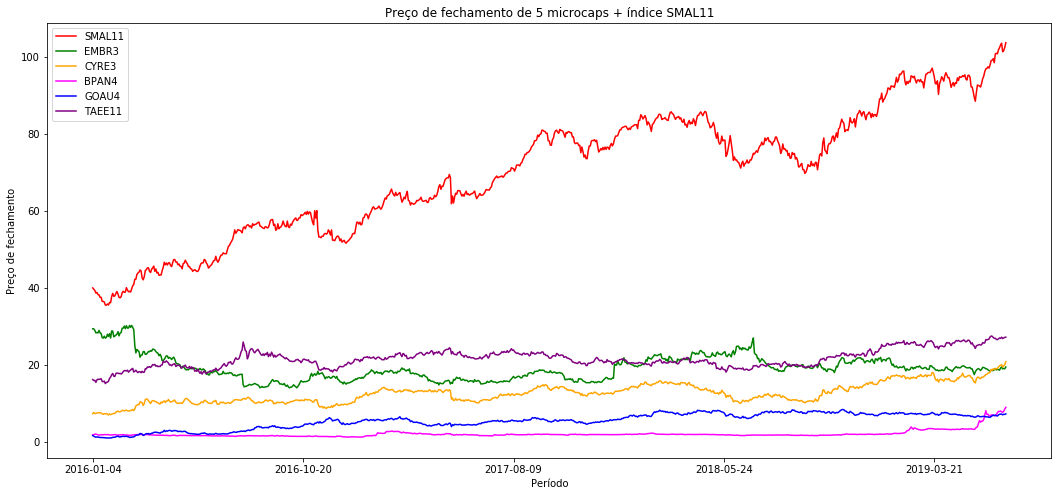

In [19]:
train_dataset_close = train1_dataset_smal11 
train_dataset_close = train_dataset_close.drop(['Adj Close','Open','Low','High','Volume'], axis=1)
train_dataset_close = train_dataset_close.rename(columns={'Close': 'SMAL11'}, inplace=False)

train_dataset_close['EMBR3']=train1_dataset_embr3.loc[:,'Close']
train_dataset_close['CYRE3']=train1_dataset_cyre3.loc[:,'Close']
train_dataset_close['BPAN4']=train1_dataset_bpan4.loc[:,'Close']
train_dataset_close['GOAU4']=train1_dataset_goau4.loc[:,'Close']
train_dataset_close['TAEE11']=train1_dataset_taee11.loc[:,'Close']

color_dict = {'SMAL11': 'red', 'EMBR3': 'green', 'CYRE3': 'orange', 'BPAN4': 'magenta', 'GOAU4': 'blue', 'TAEE11': 'purple'}

#Gráfico dos preços de fechamento    
train_dataset_close.plot(figsize=(18,8), color=[color_dict.get(x, '#3333') for x in train_dataset_close.columns])
plt.ylabel('Preço de fechamento')
plt.xlabel('Período')
plt.title('Preço de fechamento de 5 microcaps + índice SMAL11')
plt.show()

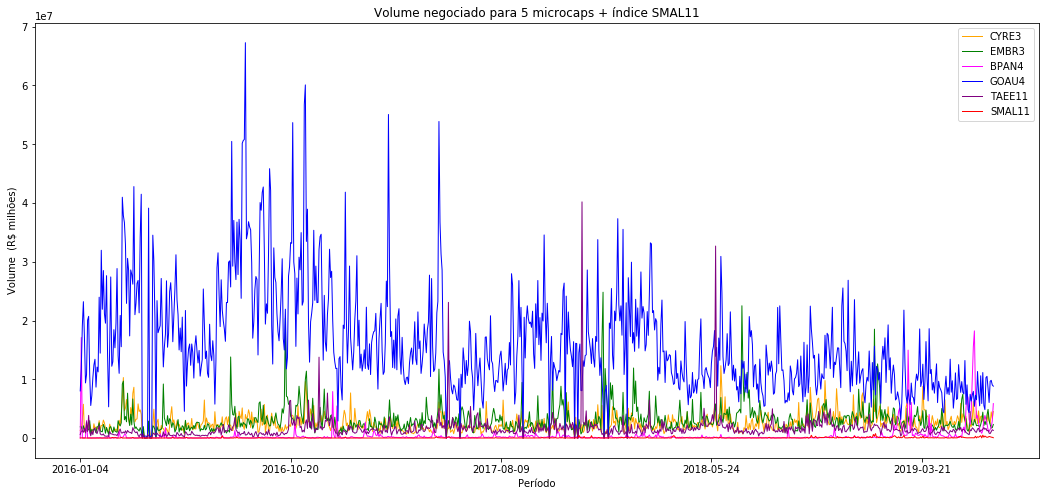

In [20]:
#Plotagem do volume negociado no período
plt.figure(figsize=(18,8))
train1_dataset_cyre3['Volume'].plot(label = 'CYRE3', linewidth = 1, color = 'orange')
train1_dataset_embr3['Volume'].plot(label = 'EMBR3', linewidth = 1, color = 'green')
train1_dataset_bpan4['Volume'].plot(label = 'BPAN4', linewidth = 1, color = 'magenta')
train1_dataset_goau4['Volume'].plot(label = 'GOAU4', linewidth = 1, color = 'blue')
train1_dataset_taee11['Volume'].plot(label = 'TAEE11', linewidth = 1, color = 'purple')
train1_dataset_smal11['Volume'].plot(label = 'SMAL11', linewidth = 1, color = 'red')
plt.ylabel('Volume  (R$ milhões)')
plt.xlabel('Período')
plt.title('Volume negociado para 5 microcaps + índice SMAL11')
plt.legend();

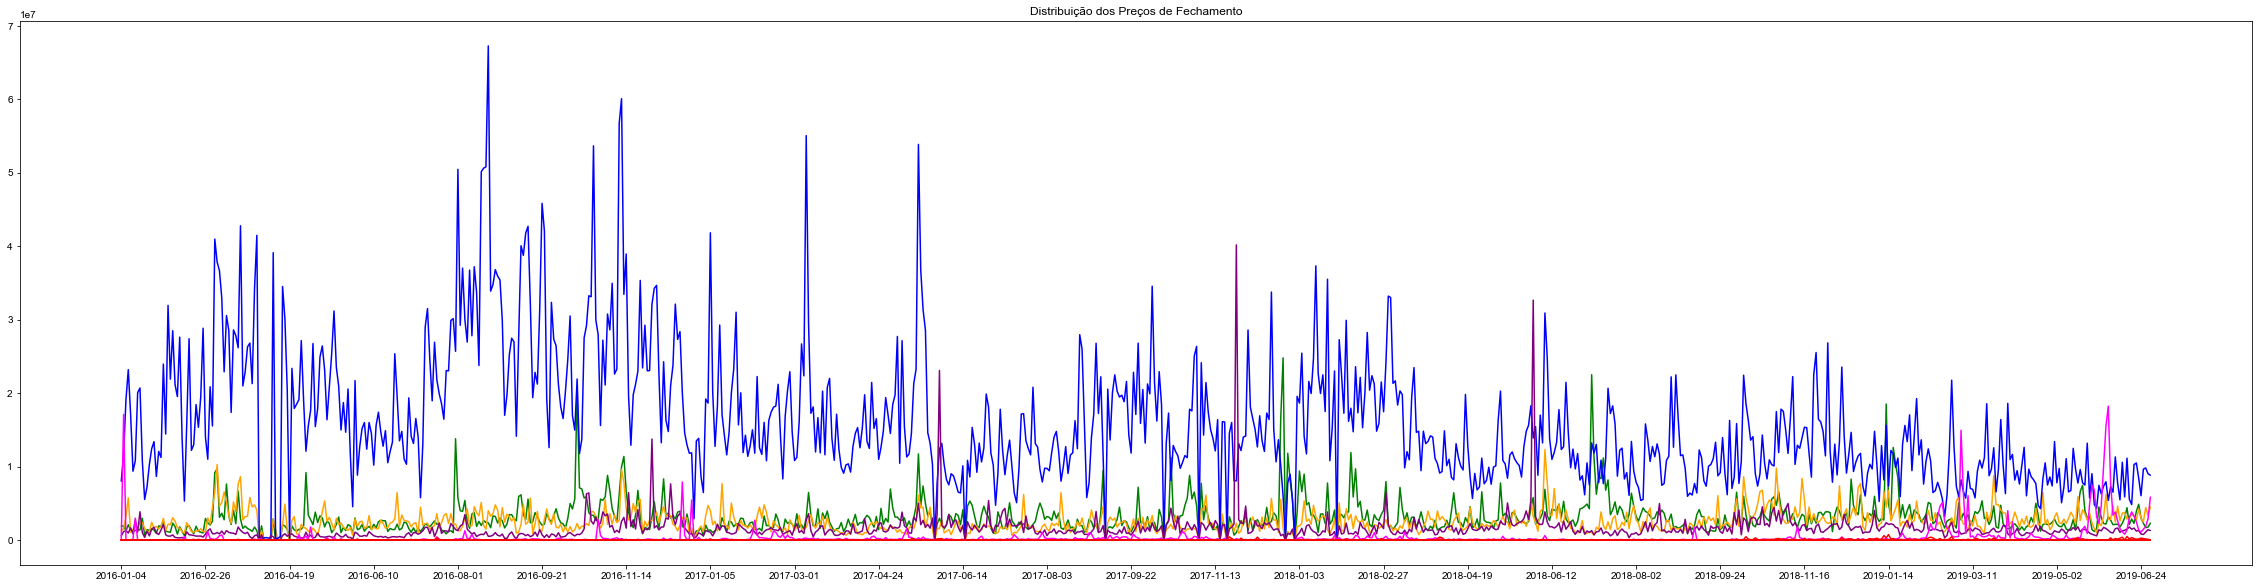

In [22]:
# importing the style package
from matplotlib import style

plt.figure(figsize=(40, 10))    #  (figsize=(80,10))
plt.title('Distribuição dos Preços de Fechamento')

# using the style for the plot
#plt.style.use('Solarize_Light2')
plt.style.use('seaborn-white')

# creating a plot
plt.plot(train1_dataset_embr3, color= 'green')
plt.plot(train1_dataset_cyre3, color= 'orange')
plt.plot(train1_dataset_goau4, color= 'blue')
plt.plot(train1_dataset_taee11, color= 'purple')
plt.plot(train1_dataset_bpan4, color= 'magenta')
plt.plot(train1_dataset_smal11, color= 'red')

x_scale = train1_dataset_goau4.index
plt.xticks(x_scale[::36])        # ,  rotation='vertical'

sns.set_context('notebook', rc={'font.size':20, 'axes.titlesize':20, 'axes.labelsize':18})   # font_scale=1.5, 

# show plot
plt.show()


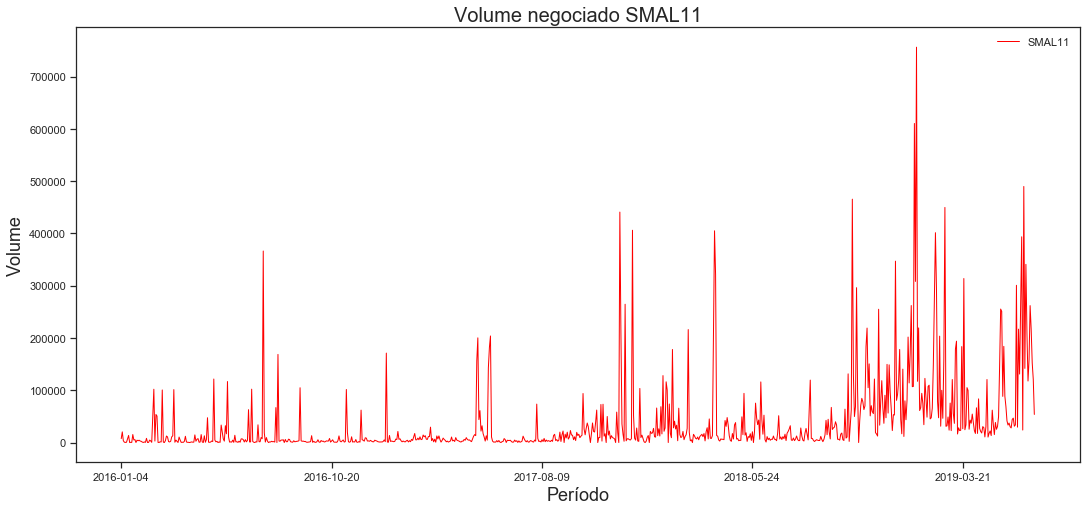

In [23]:
#Plotagem do volume negociado no período
plt.figure(figsize=(18,8))
train1_dataset_smal11['Volume'].plot(label = 'SMAL11', linewidth = 1, color = 'red')
plt.ylabel('Volume')
plt.xlabel('Período')
plt.title('Volume negociado SMAL11')
plt.legend();

In [24]:
train_dataset_adj = train1_dataset_embr3
train_dataset_adj = train_dataset_adj.drop(['Close','Open','Low','High','Volume'], axis=1)
train_dataset_adj = train_dataset_adj.rename(columns={'Adj Close': 'EMBR3'}, inplace=False)

train_dataset_adj['CYRE3']=train1_dataset_cyre3.loc[:,'Adj Close']
train_dataset_adj['BPAN4']=train1_dataset_bpan4.loc[:,'Adj Close']
train_dataset_adj['GOAU4']=train1_dataset_goau4.loc[:,'Adj Close']
train_dataset_adj['TAEE11']=train1_dataset_taee11.loc[:,'Adj Close']
train_dataset_adj['SMAL11']=train1_dataset_smal11.loc[:,'Adj Close']
train_dataset_adj

,EMBR3,CYRE3,BPAN4,GOAU4,TAEE11,SMAL11
Date,,,,,,
2016-01-04,28.464020,5.369211,1.642073,1.461226,8.909921,39.939999
2016-01-05,28.464020,5.612596,1.697114,1.342502,8.771997,39.610001
2016-01-06,28.056276,5.398713,1.834718,1.168981,8.799582,39.279999
2016-01-07,27.444672,5.428214,1.825544,1.095920,8.507181,38.599998
2016-01-08,27.541754,5.531468,1.724635,1.141583,8.871304,38.759998
...,...,...,...,...,...,...
2019-06-24,19.420000,16.503487,7.493249,6.860044,21.562426,103.449997
2019-06-25,18.930000,16.008379,7.368041,6.669221,21.284456,101.250000
2019-06-26,19.020000,16.247681,7.628089,6.821879,21.419470,101.550003


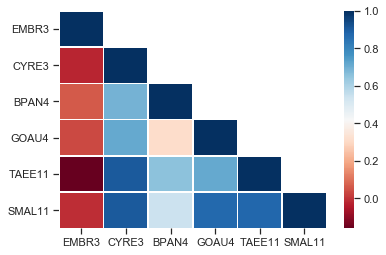

In [25]:
#Função para criação do mapa de correlação das ações
def plot_corr(corr):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, 1)] = True
    sns.heatmap(corr, mask=mask, cmap='RdBu', square=False, linewidths=.5)
    
# Cálculo da correlação
corr = train_dataset_adj.corr() 
plot_corr(corr)

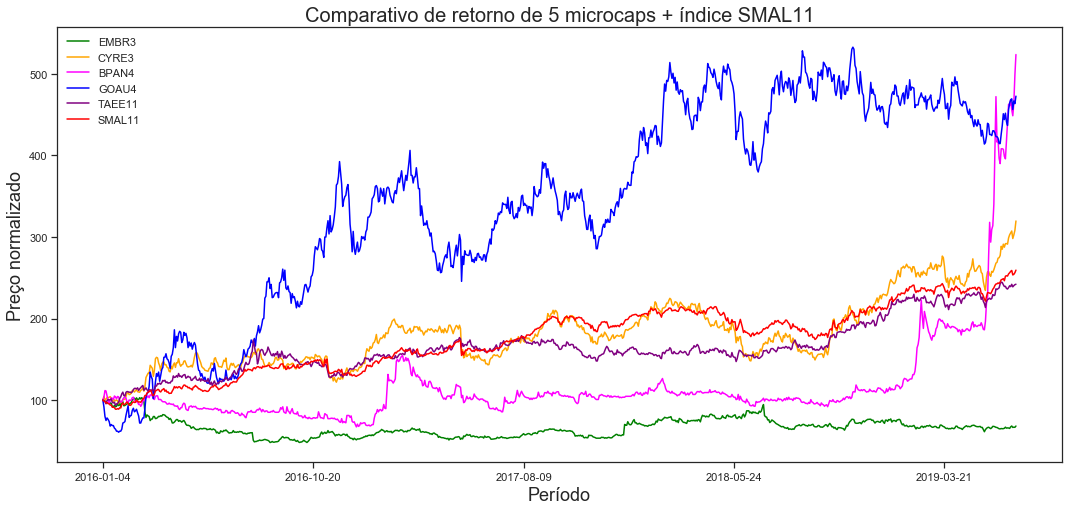

In [26]:
color_dict = {'SMAL11': 'red', 'EMBR3': 'green', 'CYRE3': 'orange', 'BPAN4': 'magenta', 'GOAU4': 'blue', 'TAEE11': 'purple'}

#Gráfico normalizado    
(train_dataset_adj/train_dataset_adj.iloc[0]*100).plot(figsize=(18,8), color=[color_dict.get(x, '#3333') for x in train_dataset_adj.columns])

plt.ylabel('Preço normalizado')
plt.xlabel('Período')
plt.title('Comparativo de retorno de 5 microcaps + índice SMAL11')
plt.show()

In [27]:
x_scale = train1_dataset_goau4.index
x_scale

Index(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
       '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14', '2016-01-15',
       ...
       '2019-06-14', '2019-06-17', '2019-06-18', '2019-06-19', '2019-06-21',
       '2019-06-24', '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28'],
      dtype='object', name='Date', length=869)

In [28]:
###################  DETALHANDO A ANÁLISE DE GOAU4 ####################3

train1_dataset_goau4.describe()

,Open,High,Low,Close,Adj Close,Volume
count,869.000000,869.000000,869.000000,869.000000,869.000000,8.690000e+02
mean,5.451335,5.548562,5.338124,5.438493,5.023295,1.603216e+07
std,1.981855,1.996956,1.955465,1.974745,1.855112,9.135366e+06
min,0.960000,0.980000,0.940000,0.970000,0.885868,0.000000e+00
25%,4.320000,4.420000,4.250000,4.340000,3.963578,1.009370e+07
50%,5.710000,5.790000,5.560000,5.670000,5.178220,1.383610e+07
75%,7.180000,7.280000,7.080000,7.160000,6.740983,2.027540e+07
max,8.550000,8.660000,8.200000,8.370000,7.785483,6.728560e+07


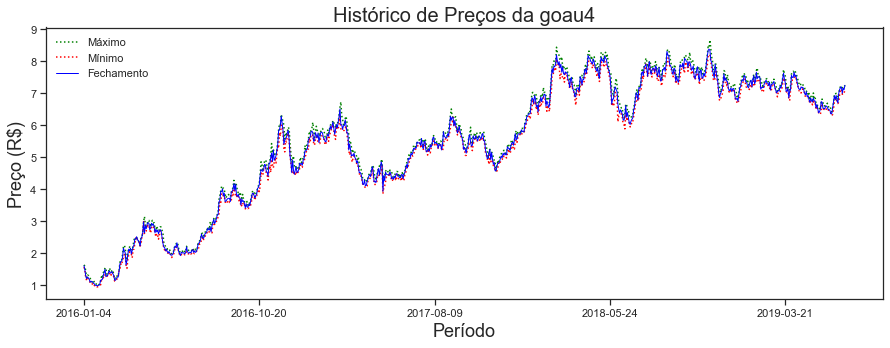

In [29]:
#Plotagem da série histórica
plt.figure(figsize=(15,5))
train1_dataset_goau4['High'].plot(label = 'Máximo', color = 'green', linestyle=":")
train1_dataset_goau4['Low'].plot(label = 'Mínimo', color = 'red', linestyle=":")
train1_dataset_goau4['Close'].plot(label = 'Fechamento', color = 'blue', linewidth=1)
plt.ylabel('Preço (R$)')
plt.xlabel('Período')
plt.title('Histórico de Preços da goau4')
plt.legend();

<h4>=======================================================================================================
<br>=======================================================================================================
<br>=========== MODELO A: REGRESSÃO LINEAR  ===============================================================
<br>=======================================================================================================
<br>=======================================================================================================
</h4>

<h3> Primeira análise: Modelagem dos dados de GOAU4 antes da Covid (1/1/2016 a 30/6/2019) </h3>

In [30]:
from pandas import read_csv
from matplotlib import pyplot

In [31]:
# Os períodos do primeiro treinamento e teste já foram definidos

# Definindo os dados de treinamento do primeiro estudo: 
train1_dataset_goau4 = dataset_goau4.loc[train_start_date: train_end_date, ]

# Definindo os dados de teste dos ativos selecionados para a primeira análise:
test1_dataset_goau4 = dataset_goau4.loc[test_start_date: test_end_date, ]

In [32]:
# Carregamento dos dados
train_smal11_close = train1_dataset_smal11
train_smal11_close = train_smal11_close.drop(['Adj Close','Open','Low','High','Volume'], axis=1)

train_goau4_close = train1_dataset_goau4
train_goau4_close = train_goau4_close.drop(['Adj Close','Open','Low','High','Volume'], axis=1)

test_goau4_close = test1_dataset_goau4
test_goau4_close = test_goau4_close.drop(['Adj Close','Open','Low','High','Volume'], axis=1)

<H4>Autocorrelation</H4>
<h5><b>An autoregression found itself in the assumption that the observations at previous time steps are useful to predict the value at the next time step.

This relationship between variables is called correlation.

If both variables change in the same direction (e.g. go up together or down together), this is called a positive correlation. If the variables move in opposite directions as values change (e.g. one goes up and one goes down), then this is called negative correlation.

We can use statistical measures to calculate the correlation between the output variable and values at previous time steps at various different lags. The stronger the correlation between the output variable and a specific lagged variable, the more weight that autoregression model can put on that variable when modeling.

AS the correlation is calculated between the variable and itself at previous time steps, it is called an autocorrelation. It is also called serial correlation because of the sequenced structure of time series data.

The correlation statistics can also help to choose which lag variables will be useful in a model and which will not.

If all lag variables show low or no correlation with the output variable, then it suggests that the problem may not be predictable using a time series model.</b></h5>

In [33]:
from pandas.plotting import lag_plot

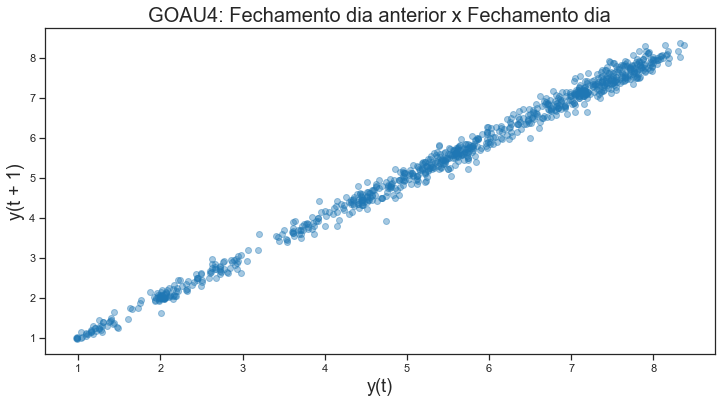

In [34]:
# VERIFICANDO SE EXISTE AUTOCORRELAÇÃO ENTRE DADOS ANTERIORES E POSTERIORES
# e PLOTANDO A CORRELAÇÃO ENTRE DADOS EM D e D+1

# plt.plot( 'x_values','z_values', data=df, linestyle='none', marker='o', color="orange", alpha=0.3)
# c1 = sns.color_palette("YlOrRd_r", 8)
from matplotlib.colors import ListedColormap

plt.figure(figsize=(12,6))
plt.title('GOAU4: Fechamento dia anterior x Fechamento dia')
plt.xlabel('Preço Fechamento dia anterior')
plt.ylabel('Preço Fechamento')
lag_plot(train_goau4_close, alpha=0.4)     
pyplot.show()

In [35]:
from pandas import concat

values_smal11 = DataFrame(train_smal11_close.values)
dataframe_smal11 = concat([values_smal11.shift(1), values_smal11], axis=1)
dataframe_smal11.columns = ['dia-1', 'dia']
result_smal11 = dataframe_smal11.corr()
print('SMAL11:\n',result_smal11)

values_goau4 = DataFrame(train_goau4_close.values)
dataframe_goau4 = concat([values_goau4.shift(1), values_goau4], axis=1)
dataframe_goau4.columns = ['dia-1', 'dia']
result_goau4 = dataframe_goau4.corr()
print('\nGOAU4:\n', result_goau4)

SMAL11:
           dia-1       dia
dia-1  1.000000  0.998471
dia    0.998471  1.000000

GOAU4:
           dia-1       dia
dia-1  1.000000  0.996778
dia    0.996778  1.000000


<h4>Autocorrelation Plots</h4>
Plot the correlation coefficient for each lag variable can very quickly give an idea of which lag variables may be good candidates for use in a predictive model and how the relationship between the observation and its historic values changes over time.

Pandas autocorrelation_plot() function calculate the correlation values for each lag variable and plot the result.

The plot provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-axis. 

It also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values. Correlation values above these lines are more significant than those below the line, providing a threshold for selecting more relevant lag values.

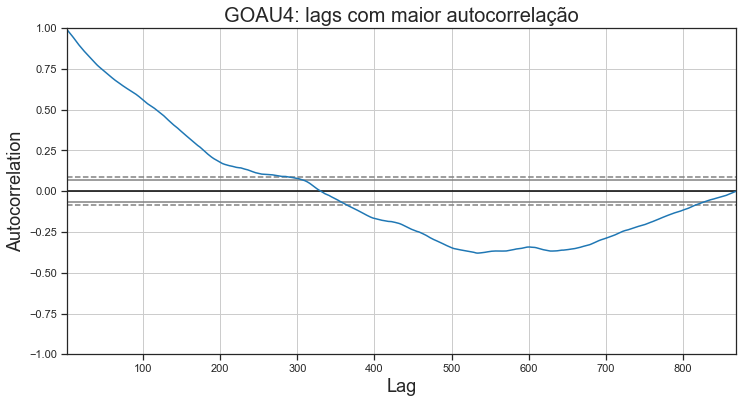

In [97]:
# PLOTANDO A AUTOCORRELAÇÃO AO LONGO DO TEMPO:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(12,6))
autocorrelation_plot(train_goau4_close)
plt.title('GOAU4: lags com maior autocorrelação')
pyplot.show()

The <b>statsmodels</b> library also provides a version of the plot in the plot_acf() function as a line plot.

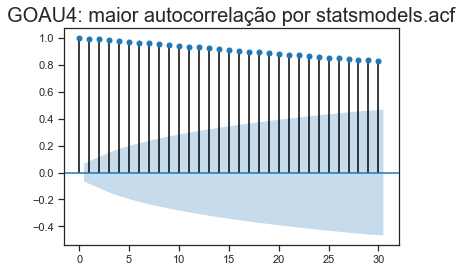

<Figure size 1440x576 with 0 Axes>

In [98]:
# OUTRA FORMA DE VERIFICAR GRAFICAMENTE A AUTOCORRELAÇÃO NOS DADOS:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train_goau4_close, lags=30)
plt.title('GOAU4: maior autocorrelação por statsmodels.acf')
plt.figure(figsize=(20,8))
pyplot.show()

<h5><br><b>PERSISTENCE MODELS</b> consist in replicating previous value (after considering the lag). 
    <br>It is a very simple prediction model and we will use it only as a reference, for baseline. 
    <br>We hope to find a model with better prediction capacity than Persistence Model.</h5>

In [37]:
train_goau4_X = train_goau4_close.values[0 : len(train_goau4_close.values) - 1, 0]
train_goau4_y = train_goau4_close.values[1 : len(train_goau4_close.values), 0]

test_goau4_X = test_goau4_close.values[0 : len(test_goau4_close.values) - 1, 0]
test_goau4_y = test_goau4_close.values[1 : len(test_goau4_close.values), 0]

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
tudo_goau4 = 'a'

tudo_goau4_close = dataset_goau4.loc[train_start_date: test_end_date, ]
tudo_goau4_close = tudo_goau4_close.drop(['Adj Close','Open','Low','High','Volume'], axis=1)

tudo_goau4_y = tudo_goau4_close.values[1 : len(tudo_goau4_close.values), 0]

In [40]:
# persistence model: média entre os "lag" últimos valores 
def model_persistence(x, lag):
    V = 0
    for t in range(lag):
        V = V + train_and_predictions[-t-1]
        #print('t:', t, 'len(predictions)=', len(predictions), ' Pred[-', (t+1), ']=', predictions[-t-1], ' V=', V, '\n')     # 
    
    V = V/lag
    return V
 
# walk-forward validation
predictions = list()
train_and_predictions = list()
for i in range (train_goau4_X.shape[0]):
    train_and_predictions.append(train_goau4_X[i])

for t in range(len(test_goau4_X) ):
    yhat = model_persistence(t, 20)
    predictions.append(yhat)
    train_and_predictions.append(yhat)
    
#>>>>>>> 
test_score = mean_squared_error(test_goau4_y, predictions)
print('\nTest Mean Squared Error: %.3f' % test_score, '\n')
#>>>>>>> 
    



Test Mean Squared Error: 13.509 



In [41]:
pred_df = pd.DataFrame(data = predictions, 
                        index = test1_dataset_goau4.index[1:], 
                        columns = ["Prediction"])

In [42]:
series_dataset = dataset_goau4 [train_start_date:]
series_dataset = series_dataset.drop(['Adj Close','Open','Low','High','Volume'], axis=1)
series_dataset = series_dataset.rename(columns={'Close': 'Train'}, inplace=False)

series_dataset['Train']=train1_dataset_goau4.loc[:,'Close']
series_dataset['Test']=test1_dataset_goau4.loc[:,'Close']
series_dataset['Predict']=pred_df

In [43]:
series_dataset

,Train,Test,Predict
Date,,,
2016-01-04,1.60,NaN,NaN
2016-01-05,1.47,NaN,NaN
2016-01-06,1.28,NaN,NaN
2016-01-07,1.20,NaN,NaN
2016-01-08,1.25,NaN,NaN
...,...,...,...
2021-06-21,NaN,13.90,6.920762
2021-06-22,NaN,13.86,6.920762
2021-06-23,NaN,13.78,6.920762


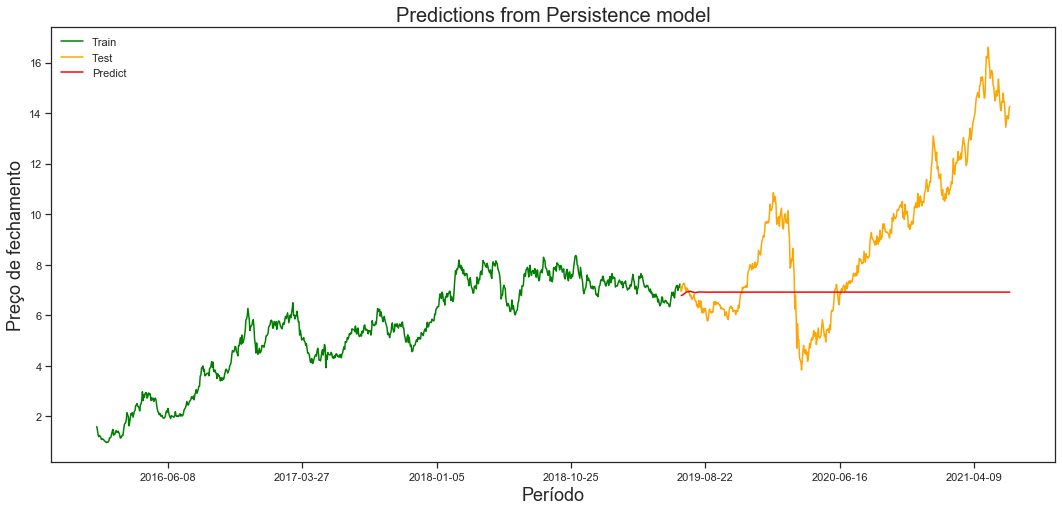

In [44]:
series_dataset = dataset_goau4 
series_dataset = series_dataset.drop(['Adj Close','Open','Low','High','Volume'], axis=1)
series_dataset = series_dataset.rename(columns={'Close': 'Train'}, inplace=False)

series_dataset['Train']=train1_dataset_goau4.loc[:,'Close']
series_dataset['Test']=test1_dataset_goau4.loc[:,'Close']
series_dataset['Predict']=pred_df

color_dict = {'Train': 'green', 'Test': 'orange', 'Predict': '#FF0000'}

#Gráfico dos preços de fechamento    
series_dataset.plot(figsize=(18,8), color=[color_dict.get(x, '#3333') for x in series_dataset.columns])
plt.ylabel('Preço de fechamento')
plt.xlabel('Período')
plt.title('Predictions from Persistence model')

#x_scale = train1_dataset_goau4.index.append(test1_dataset_goau4.index)
#plt.xticks(x_scale[::36])        # ,  rotation='vertical'

plt.show()

In [50]:
print('\nTimesteps=', timesteps)

# Cálculo das medidas de precisão: 
# Mean Squared Error: (MSE): 
MSE = mean_squared_error(test_goau4_y, predictions)
print(f'Test Mean Squared Error (MSE): %.3f' % MSE)

# Cálculo das medidas de precisão: Mean Absolute Error (MAE)
MAE = mean_absolute_error(test_goau4_y, predictions)
print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(test_goau4_y, predictions)/ test_goau4_y))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(test_goau4_y, predictions)/ test_goau4_y)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')



Test Mean Squared Error: 13.509 

Mean Absolute Error (MAE): 2.79
Mean Absolute Percentage Error (MAPE): 27.07 %
Median Absolute Percentage Error (MDAPE): 27.91 %


<h4>==========  Autoregression Model para GOAU4 ==========</h4>
<br>An autoregression model is a linear regression model that uses lagged variables as input variables. 

We will use the autoregression model provided in statsmodels library, in the AutoReg class. 

We have to provide an appropriate lag value and train a linear regression model by first creating the model AutoReg() and then calling fit() to train it on our dataset. This returns an AutoRegResults object.

Once fit, we can use the model to make a prediction by calling the predict() function for a number of observations in the future. This creates forecast for future values, different from the persistence model above.

<h4><U> GOAU4 - Primeira análise</U>: Treinando o modelo com dados entre 2016 e jun/2020 e validando com dados de jul/2020 a jun/2021<br></h4>

In [51]:
# create and evaluate a static autoregressive model
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt

# get dataset
train_goau4 = train_goau4_close.values
test_goau4 = test_goau4_close.values
train_goau4

array([[1.6 ],
       [1.47],
       [1.28],
       [1.2 ],
       [1.25],
       [1.22],
       [1.18],
       [1.09],
       [1.12],
       [1.1 ],
       [1.1 ],
       [1.05],
       [1.03],
       [0.99],
       [0.99],
       [0.97],
       [0.99],
       [0.99],
       [1.03],
       [1.15],
       [1.16],
       [1.18],
       [1.3 ],
       [1.4 ],
       [1.49],
       [1.26],
       [1.29],
       [1.3 ],
       [1.4 ],
       [1.44],
       [1.37],
       [1.39],
       [1.42],
       [1.35],
       [1.29],
       [1.15],
       [1.15],
       [1.21],
       [1.25],
       [1.25],
       [1.44],
       [1.66],
       [1.73],
       [1.75],
       [1.87],
       [2.15],
       [2.06],
       [2.01],
       [1.63],
       [1.76],
       [1.96],
       [2.12],
       [2.07],
       [2.15],
       [1.97],
       [2.08],
       [2.2 ],
       [2.24],
       [2.44],
       [2.44],
       [2.51],
       [2.41],
       [2.39],
       [2.33],
       [2.22],
       [2.46],
       [2.

In [52]:
train_goau4 = train1_dataset_goau4['Close'].values
test_goau4 = test1_dataset_goau4['Close'].values

In [53]:
train_goau4_close.info()

<class 'pandas.core.frame.DataFrame'>
Index: 869 entries, 2016-01-04 to 2019-06-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   869 non-null    float64
dtypes: float64(1)
memory usage: 53.6+ KB


In [98]:
train1_dataset_goau4.describe()

,Open,High,Low,Close,Adj Close,Volume
count,869.000000,869.000000,869.000000,869.000000,869.000000,8.690000e+02
mean,5.451335,5.548562,5.338124,5.438493,5.023295,1.603216e+07
std,1.981855,1.996956,1.955465,1.974745,1.855112,9.135366e+06
min,0.960000,0.980000,0.940000,0.970000,0.885868,0.000000e+00
25%,4.320000,4.420000,4.250000,4.340000,3.963578,1.009370e+07
50%,5.710000,5.790000,5.560000,5.670000,5.178220,1.383610e+07
75%,7.180000,7.280000,7.080000,7.160000,6.740983,2.027540e+07
max,8.550000,8.660000,8.200000,8.370000,7.785483,6.728560e+07


To get a series of future values predicted, we can re-train the AutoReg model for the next window, including que new predicted values in the trainning data, but this would propagate the error in the predicted values.

An alternative better way would be to use the learned coefficients and manually make predictions. This requires that the values predicted for the next interval be appended to the history  prior observations.

The coefficients can be retrieved from the model and used in a regression equation to come up with new forecasts.

The coefficients are provided in an array with the intercept term followed by the coefficients for each lag variable starting at t-1 to t-n. We simply need to use them in the right order on the history of observations, as follows:

In [110]:
# train autoregression
window = 100
model_goau4 = AutoReg(train_goau4, lags=window)
model_goau4
model_goau4_fit = model_goau4.fit()
coef = model_goau4_fit.params
#print('\nCoefficients: \n%s' % coef, '\nLen(coef): ', len(coef))

In [111]:
# walk forward over time steps in test:
history = train_goau4[len(train_goau4)-window:]                     # type(history) = numpy.ndarray
history = [history[i] for i in range(len(history))]     # transforma numa lista com 29 arrays

predictions_goau4 = list()
for t in range(len(test_goau4_close)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        y1 = coef[d+1]
        y2 = lag[window-d-1]
        yhat += coef[d+1] * lag[window-d-1]
    predictions_goau4.append(yhat)
    history.append(yhat)      #  (obs)
    if (t < len(test_goau4_close) and t < 5):
        obs = test_goau4[t]
        print('Day %i: predicted = %f, expected = %f' % (t+1, yhat, obs))
    else:
        if (t == len(test_goau4_close)):
            print('..........\nDay %i: predicted = %f, expected = unknown from now on' % (t+1, yhat))

Day 1: predicted = 7.169437, expected = 7.150000
Day 2: predicted = 7.163519, expected = 6.950000
Day 3: predicted = 7.185783, expected = 7.050000
Day 4: predicted = 7.187031, expected = 7.220000
Day 5: predicted = 7.158253, expected = 7.230000


In [112]:
print('\nWindow=', window)

# Cálculo das medidas de precisão: 
# Mean Squared Error: (MSE): 
MSE = mean_squared_error(test_goau4_y, predictions_goau4[:len(test_goau4_y)])
print(f'Test Mean Squared Error (MSE): %.3f' % MSE)

# Cálculo das medidas de precisão: Mean Absolute Error (MAE)
MAE = mean_absolute_error(test_goau4_y, predictions_goau4[:len(test_goau4_y)])
print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(test_goau4_y, predictions_goau4[:len(test_goau4_y)])/ test_goau4_y))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(test_goau4_y, predictions_goau4[:len(test_goau4_y)])/ test_goau4_y)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')


Window= 100
Test Mean Squared Error (MSE): 12.397
Mean Absolute Error (MAE): 2.69
Mean Absolute Percentage Error (MAPE): 26.66 %
Median Absolute Percentage Error (MDAPE): 26.09 %


In [126]:
minsq = mean_squared_error(test_goau4, predictions_goau4[:len(test_goau4)])
rmse = sqrt(mean_squared_error(test_goau4, predictions_goau4[:len(test_goau4)]))
print('\nWindow=', window, '  Test Mean Squared error: %.3f' % minsq, 'Test Root Mean Squared Error: %.3f' % rmse)


Window= 5   Test Mean Squared error: 13.824 Test RMSE: 3.718


In [123]:
minsq = mean_squared_error(test_goau4, predictions_goau4[:len(test_goau4)])
rmse = sqrt(mean_squared_error(test_goau4, predictions_goau4[:len(test_goau4)]))
print('\nWindow=', window, '\nTest Mean Squared error: %.3f' % minsq, '\nTest RMSE: %.3f' % rmse)


Window= 10   Test Mean Squared error: 14.041 Test RMSE: 3.747


In [101]:
minsq = mean_squared_error(test_goau4, predictions_goau4[:len(test_goau4)])
rmse = sqrt(mean_squared_error(test_goau4, predictions_goau4[:len(test_goau4)]))
print('\nWindow=', window, '  Test Mean Squared error: %.3f' % minsq, 'Test RMSE: %.3f' % rmse)


Window= 20   Test Mean Squared error: 13.690 Test RMSE: 3.700


In [108]:
minsq = mean_squared_error(test_goau4, predictions_goau4[:len(test_goau4)])
rmse = sqrt(mean_squared_error(test_goau4, predictions_goau4[:len(test_goau4)]))
print('\nWindow=', window, '  Test Mean Squared error: %.3f' % minsq, 'Test RMSE: %.3f' % rmse)


Window= 50   Test Mean Squared error: 13.026 Test RMSE: 3.609


In [129]:
minsq = mean_squared_error(test_goau4, predictions_goau4[:len(test_goau4)])
rmse = sqrt(mean_squared_error(test_goau4, predictions_goau4[:len(test_goau4)]))
print('\nWindow=', window, '  Test Mean Squared error: %.3f' % minsq, 'Test RMSE: %.3f' % rmse)


Window= 100   Test Mean Squared error: 12.370 Test RMSE: 3.517


In [103]:
# Aqui, os dados de teste e treinamento estão sendo concatenados apenas para apresentação no gráfico!
# Os dados de predição já foram gerados, seu uso da informação dos dados de teste!

test_from_ini = np.concatenate((train_goau4, test_goau4))
prev_from_ini = np.concatenate((train_goau4, predictions_goau4[0:len(test_goau4)]))

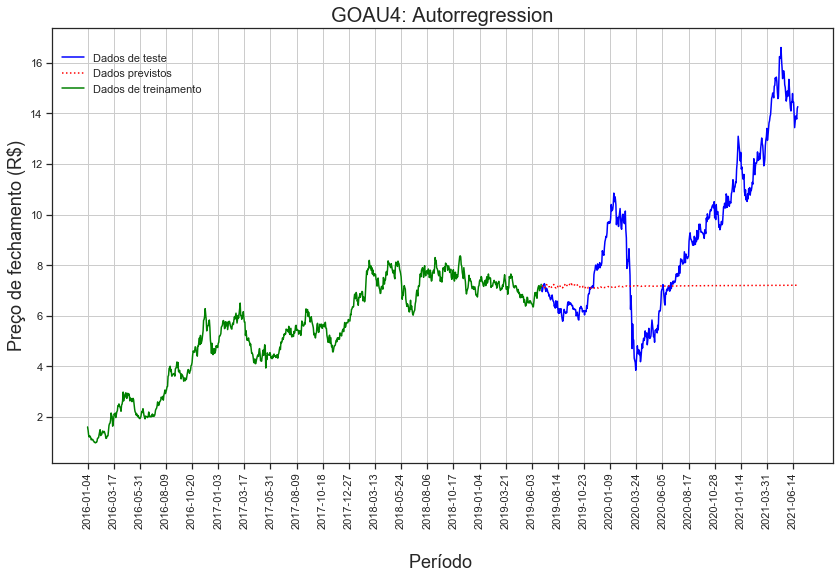

In [113]:
#Plotagem dos dados de treinamento, teste e previsões
plt.figure(figsize=(14,8))
plt.title('GOAU4: Autorregression')

plt.plot(dataset_goau4[train_start_date: test_end_date].index, test_from_ini, color = 'white', label = '   ')
plt.plot(test1_dataset_goau4.index, test_goau4, color = 'blue', label = 'Dados de teste')
plt.plot(test1_dataset_goau4[test_start_date:].index, predictions_goau4, color = 'red', label = 'Dados previstos', linestyle=':')
plt.plot(train1_dataset_goau4.index, train_goau4, color='green', label = 'Dados de treinamento')

x_scale = train1_dataset_goau4.index.append(test1_dataset_goau4.index)
plt.xticks(x_scale[::50], rotation='vertical')   # 

x_label = '\nPeríodo '    #+ train_start_date + ' a ' + test_end_date 
plt.xlabel(x_label)
plt.ylabel('Preço de fechamento (R$)')
plt.legend()
plt.grid(True)

plt.show()

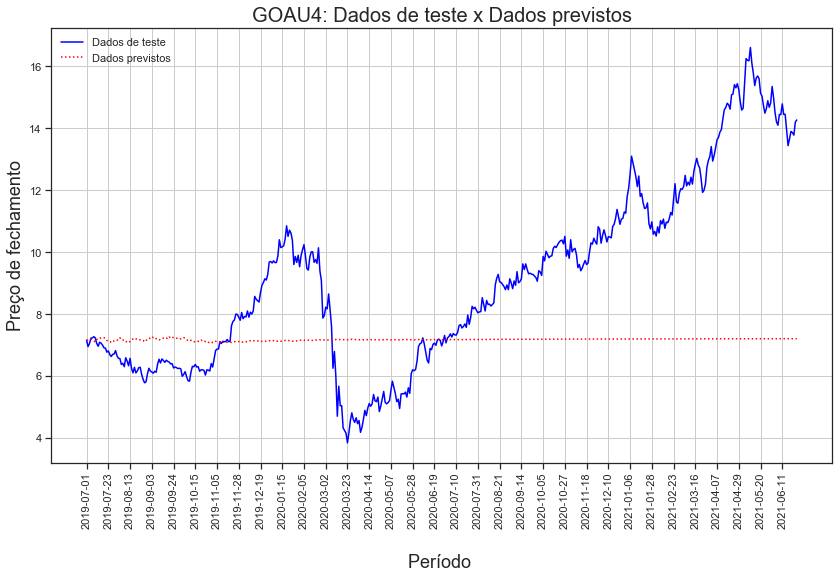

In [149]:
#Plotagem dos dados de treinamento, teste e previsões
plt.figure(figsize=(14,8))
plt.title('GOAU4 Autoregression: Dados de teste x Dados previstos')

#plt.plot(dataset_goau4[train_start_date: test_end_date].index, test_from_ini, color = 'white', label = '   ')
plt.plot(test1_dataset_goau4.index, test_goau4, color = 'blue', label = 'Dados de teste')
plt.plot(test1_dataset_goau4[test_start_date:].index, predictions_goau4, color = 'red', label = 'Dados previstos', linestyle=':')

x_scale = test1_dataset_goau4.index
plt.xticks(x_scale[::15], rotation='vertical')   # 

x_label = '\nPeríodo '    #+ train_start_date + ' a ' + test_end_date 
plt.xlabel(x_label)
plt.ylabel('Preço de fechamento')
plt.legend()
plt.grid(True)
#plt.savefig('arima1.pdf')
plt.show()

<h4> GERANDO PREVISÕES PARA O FUTURO! </h4>

In [150]:
import datetime

def workdays(d, end, excluded=(6, 7)):
    days = []
    while d.date() <= end.date():
        if d.isoweekday() not in excluded:
            days.append(d.strftime('%Y-%m-%d'))
        d += datetime.timedelta(days=1)
    return days

fut_workdays = []
fut_workdays = workdays(datetime.datetime(2021, 6, 26),  datetime.datetime(2021, 12, 31))
                    
fut_workdays[0:7]

['2021-06-28',
 '2021-06-29',
 '2021-06-30',
 '2021-07-01',
 '2021-07-02',
 '2021-07-05',
 '2021-07-06']

In [151]:
fut = pd.DataFrame(data=fut_workdays, columns=["Date"])
fut.set_index('Date', inplace = True)

pred2_dates = test1_dataset_goau4.index.append(fut.index)

print(len(test1_dataset_goau4),len(fut.index), len(pred2_dates))
fut[:5]

491 135 626


""
Date
2021-06-28
2021-06-29
2021-06-30
2021-07-01
2021-07-02


In [152]:
# walk forward over time steps in test AND BEYOND:
history = train_goau4[len(train_goau4)-window:]                     # type(history) = numpy.ndarray
history = [history[i] for i in range(len(history))]     # transforma numa lista com 29 arrays

predictions_goau4 = list()
for t in range(len(pred2_dates)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        y1 = coef[d+1]
        y2 = lag[window-d-1]
        yhat += coef[d+1] * lag[window-d-1]
    predictions_goau4.append(yhat)
    history.append(yhat)      #  (obs)
    if (t < len(test_goau4_close) and t < 4):
        obs = test_goau4[t]
        print('Day %i: predicted = %f, expected = %f' % (t+1, yhat, obs))
    else:
        if (t == len(test_goau4_close)-1):
            print('..........\nDay %i: predicted = %f, expected = %f' % (t+1, yhat, obs))
        else:
            if (t == len(test_goau4_close)):
                print('Day %i: predicted = %f, expected = unknown from now on' % (t+1, yhat))
            else:
                if (t == len(pred2_dates)-1):
                    print('Day %i: predicted = %f (ultimo valor calculado)' % (t+1, yhat))


Day 1: predicted = 7.169437, expected = 7.150000
Day 2: predicted = 7.163519, expected = 6.950000
Day 3: predicted = 7.185783, expected = 7.050000
Day 4: predicted = 7.187031, expected = 7.220000
..........
Day 491: predicted = 7.204640, expected = 7.220000
Day 492: predicted = 7.204856, expected = unknown from now on
Day 626: predicted = 7.211340 (ultimo valor calculado)


In [153]:
fut = pd.DataFrame(data=fut_workdays, columns=["Date"])

fut.set_index('Date', inplace = True)

pred2_dates = test1_dataset_goau4.index.append(fut.index)

print(len(test1_dataset_goau4),len(fut.index), len(pred2_dates))
fut[:5]

491 135 626


""
Date
2021-06-28
2021-06-29
2021-06-30
2021-07-01
2021-07-02


In [154]:
# Aqui, os dados de teste e treinamento estão sendo concatenados apenas para apresentação no gráfico!
# Os dados de predição já foram gerados, seu uso da informação dos dados de teste!

prev_from_ini = np.concatenate((train_goau4, predictions_goau4))  # dados de treinamento + previsões (período de teste e futuro)

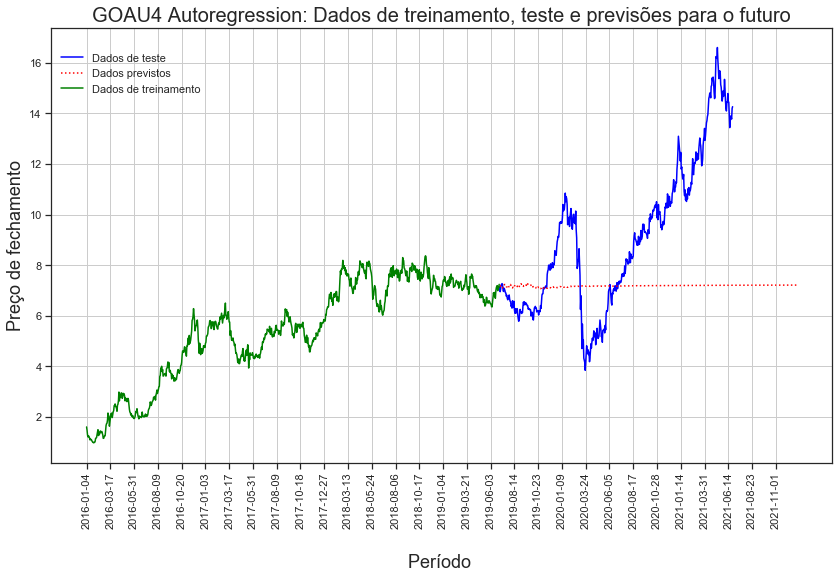

In [157]:
#Plotagem dos dados de treinamento, teste e previsões
plt.figure(figsize=(14,8))
plt.title('GOAU4 Autoregression: Dados de treinamento, teste e previsões para o futuro')

x_scale = train1_dataset_goau4.index.append(test1_dataset_goau4.index)
x_scale = x_scale.append(fut.index)

#plt.plot(dataset_goau4[train_start_date:].index, test_from_ini, color = 'blue', label = 'Dados de teste')
#plt.plot(dataset_goau4[train_start_date:].index, prev_from_ini, color = 'red', label = 'Dados previstos', linestyle=':')
plt.plot(x_scale, prev_from_ini, color = 'white', label = '   ')
plt.plot(test1_dataset_goau4.index, test_goau4, color = 'blue', label = 'Dados de teste')
plt.plot(pred2_dates, predictions_goau4, color = 'red', label = 'Dados previstos', linestyle=':')
plt.plot(train1_dataset_goau4.index, train_goau4, color='green', label = 'Dados de treinamento')

plt.xticks(x_scale[::50], rotation='vertical')   # 

x_label = '\nPeríodo '    #+ train_start_date + ' a ' + test_end_date 
plt.xlabel(x_label)
plt.ylabel('Preço de fechamento')
plt.legend()
plt.grid(True)
#plt.savefig('arima1.pdf')
plt.show()

In [141]:

x_scale = train1_dataset_goau4.index.append(test1_dataset_goau4.index)
x_scale = x_scale.append(fut.index)
print(len(x_scale))


1495


<h4>=======================================================================================================
<br>=======================================================================================================
<br>===========    MODELO B: preditivo com RNN com arquitetura LSTM (Long Short Term Memory)  ========================
<br>=======================================================================================================
<br>=======================================================================================================
</h4>

In [60]:
test_goau4_close

,Close
Date,
2019-07-01,7.15
2019-07-02,6.95
2019-07-03,7.05
2019-07-04,7.22
2019-07-05,7.23
...,...
2021-06-21,13.90
2021-06-22,13.86
2021-06-23,13.78


In [61]:
#Normalização dos dados (1)
train_goau4_close

,Close
Date,
2016-01-04,1.60
2016-01-05,1.47
2016-01-06,1.28
2016-01-07,1.20
2016-01-08,1.25
...,...
2019-06-24,7.19
2019-06-25,6.99
2019-06-26,7.15


In [114]:
# Normalização dos dados (2)
train_goau4_close_values = train_goau4_close.values    # seleciona o preço de fechamento

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled_lstm = scaler.fit_transform(train_goau4_close.values) 

In [115]:
print(train_goau4_close.shape[0], len(train_goau4_close)) 

869 869


In [129]:
#Criação de uma estrutura de dados com 100 timesteps e 1 saída que neste caso será o preço de fechamento da ação
timesteps = 20
x_train_lstm = []
y_train_lstm = []
for i in range(timesteps, train_goau4_close.shape[0]):
    x_train_lstm.append(train_scaled_lstm[i-timesteps:i, 0]) #Utilização de 60 timesteps anteriores
    y_train_lstm.append(train_scaled_lstm[i, 0]) # O 20º preço de fechamento será o valor de y
x_train_lstm, y_train_lstm = np.array(x_train_lstm), np.array(y_train_lstm)

In [130]:
#Reshaping o dataset de treinamento 
#Sendo o segundo parâmetro como: 
       #x_train_lstm.shape[0] = batch_size, que é o número de preços de ações do período de treinamento
       #x_train_lstm.shape[1] = time_step, que é o número de preços anteriores
       #input_dim = 1, que indica que será usado o preço de fechamento
x_train_lstm = np.reshape(x_train_lstm, (x_train_lstm.shape[0], x_train_lstm.shape[1], 1))   # 1182 e 60

In [131]:
# x_train_lstm.shape
x_train_lstm

array([[[0.08513514],
        [0.06756757],
        [0.04189189],
        ...,
        [0.0027027 ],
        [0.00810811],
        [0.02432432]],

       [[0.06756757],
        [0.04189189],
        [0.03108108],
        ...,
        [0.00810811],
        [0.02432432],
        [0.02567568]],

       [[0.04189189],
        [0.03108108],
        [0.03783784],
        ...,
        [0.02432432],
        [0.02567568],
        [0.02837838]],

       ...,

       [[0.75945946],
        [0.75945946],
        [0.75405405],
        ...,
        [0.83783784],
        [0.84054054],
        [0.81351351]],

       [[0.75945946],
        [0.75405405],
        [0.74459459],
        ...,
        [0.84054054],
        [0.81351351],
        [0.83513514]],

       [[0.75405405],
        [0.74459459],
        [0.74459459],
        ...,
        [0.81351351],
        [0.83513514],
        [0.82837838]]])

In [132]:
#Criação da LSTM utilizando a biblioteca Keras

# Inicialização da RNN
model_rnn = Sequential()

#O parâmetro return_sequences=True indica que a rede terá mais camadas a frente
#O parâmetro Dropout ajuda no ajuste do Overfitting

# Adiciona a primeira camada LSTM com o Dropout 
model_rnn.add(LSTM(units = 128, return_sequences = True, input_shape = (x_train_lstm.shape[1], 1)))
model_rnn.add(Dropout(0.3))

# Adiciona a segunda camada LSTM com o Dropout
model_rnn.add(LSTM(units = 64))
model_rnn.add(Dropout(0.3))

# Adiciona a camada de saída 
#model_rnn.add(Dense(16,init='uniform',activation='relu'))
model_rnn.add(Dense(1,init='uniform',activation='linear'))

# Compila a RNN, neste caso utilizando o otimizador 'Adam'
model_rnn.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mean_absolute_error'])

model_rnn

In [68]:
y_train_lstm

array([0.02567568, 0.02837838, 0.04459459, 0.05810811, 0.07027027,
       0.03918919, 0.04324324, 0.04459459, 0.05810811, 0.06351351,
       0.05405405, 0.05675676, 0.06081081, 0.05135135, 0.04324324,
       0.02432432, 0.02432432, 0.03243243, 0.03783784, 0.03783784,
       0.06351351, 0.09324324, 0.1027027 , 0.10540541, 0.12162162,
       0.15945946, 0.1472973 , 0.14054054, 0.08918919, 0.10675676,
       0.13378378, 0.15540541, 0.14864865, 0.15945946, 0.13513514,
       0.15      , 0.16621622, 0.17162162, 0.19864865, 0.19864865,
       0.20810811, 0.19459459, 0.19189189, 0.18378378, 0.16891892,
       0.20135135, 0.20675676, 0.22432432, 0.27162162, 0.22432432,
       0.25405405, 0.24189189, 0.26081081, 0.26756757, 0.26486486,
       0.23783784, 0.24459459, 0.26486486, 0.25675676, 0.26216216,
       0.25      , 0.22432432, 0.23918919, 0.22837838, 0.23648649,
       0.22027027, 0.23108108, 0.23783784, 0.23108108, 0.20675676,
       0.18108108, 0.16486486, 0.16216216, 0.14864865, 0.15540

In [133]:
# Faz o treinamento da RNN utilizando o dataset de treinamento
model_rnn.fit(x_train_lstm, y_train_lstm, epochs = 100, batch_size = 32) 
model_rnn

Epoch 1/100
849/849 [==============================] - 1s 1ms/step - loss: 0.1185 - mean_absolute_error: 0.2569
Epoch 2/100
849/849 [==============================] - 0s 521us/step - loss: 0.0122 - mean_absolute_error: 0.0855
Epoch 3/100
849/849 [==============================] - 0s 547us/step - loss: 0.0082 - mean_absolute_error: 0.0722
Epoch 4/100
849/849 [==============================] - 1s 629us/step - loss: 0.0077 - mean_absolute_error: 0.0679
Epoch 5/100
849/849 [==============================] - 0s 565us/step - loss: 0.0067 - mean_absolute_error: 0.0630
Epoch 6/100
849/849 [==============================] - 0s 567us/step - loss: 0.0062 - mean_absolute_error: 0.0610
Epoch 7/100
849/849 [==============================] - 0s 577us/step - loss: 0.0061 - mean_absolute_error: 0.0613
Epoch 8/100
849/849 [==============================] - 0s 509us/step - loss: 0.0061 - mean_absolute_error: 0.0597
Epoch 9/100
849/849 [==============================] - 0s 547us/step - loss: 0.0070 - mean

849/849 [==============================] - 1s 859us/step - loss: 0.0036 - mean_absolute_error: 0.0456
Epoch 73/100
849/849 [==============================] - 1s 961us/step - loss: 0.0032 - mean_absolute_error: 0.0439
Epoch 74/100
849/849 [==============================] - 1s 638us/step - loss: 0.0033 - mean_absolute_error: 0.0439
Epoch 75/100
849/849 [==============================] - 1s 640us/step - loss: 0.0029 - mean_absolute_error: 0.0412
Epoch 76/100
849/849 [==============================] - 1s 630us/step - loss: 0.0032 - mean_absolute_error: 0.0435
Epoch 77/100
849/849 [==============================] - 1s 659us/step - loss: 0.0027 - mean_absolute_error: 0.0397
Epoch 78/100
849/849 [==============================] - 1s 647us/step - loss: 0.0032 - mean_absolute_error: 0.0431
Epoch 79/100
849/849 [==============================] - 1s 656us/step - loss: 0.0029 - mean_absolute_error: 0.0415
Epoch 80/100
849/849 [==============================] - 1s 641us/step - loss: 0.0029 - mean_a

In [120]:
model_rnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 128)          66560     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


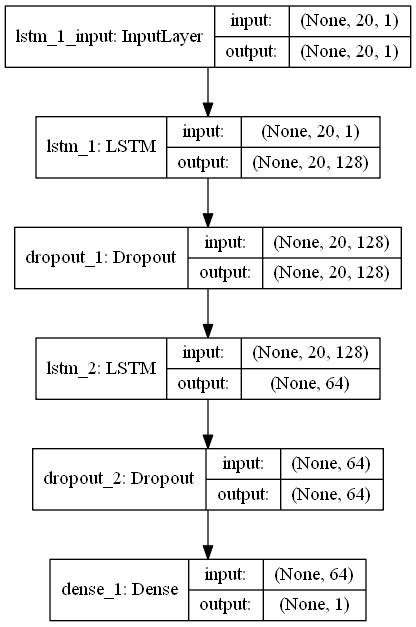

In [106]:
#Visualização do modelo
plot_model(model_rnn, show_shapes=True) #Acrescente o parâmetro 'to_file='model_rnn.png' para exportar a figura

In [70]:
#Carregamentos dos dados de teste para fazer as predições
test_lstm = test_goau4_close.iloc[:,0:1].values #seleciona o preço de fechamento

In [71]:
#******************************************************************************************************************************
#********************                   ISTO ESTÁ ERRADO!!!   
#********************
#******************** TENHO QUE CONCATENAR O VALOR PREVISTO PELO MODELO, PARA GERAR O PRÓXIMO
#******************** O DADO DE TESTE SERVE SÓ PARA COMPARAR SE A PREVISÃO FOI BOA. CASO CONTRÁRIO, NUNCA CONSEGUIREI
#******************** USAR O MODELO PARA PREDIZER VALORES FUTUROS, PARA OS PRÓXIMOS 30 DIAS, POIS AINDA NÃO TENHO OS 
#******************** DADOS DE "TESTE", QUE DO MODO COMO ESTÁ O CÓDIGO, SÃO NECESSÁRIOS PARA GERAR OS PROXIMOS VALORES.
#******************************************************************************************************************************

# Concatena os dados de treinamento e teste, pois os preços de fechamento anteriores não estão no conjunto de teste
combine = pd.concat((train_goau4_close['Close'], test_goau4_close['Close']), axis = 0)

# Tratamento do conjunto de teste considerando os timesteps anteriores
test_inputs = combine[len(combine) - len(train_goau4_close) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)

# Normalização dos dados
test_inputs = scaler.transform(test_inputs)

# Predição utilizando os dados de teste   ******** NÃO PODE USAR OS DADOS DE TESTE NA PREDIÇÃO!!!!!     ********
x_test_close = []
for i in range(timesteps, train_goau4_close.shape[0]+timesteps):
    x_test_close.append(test_inputs[i-timesteps:i, 0])
x_test_close = np.array(x_test_close)
x_test_close = np.reshape(x_test_close, (x_test_close.shape[0], x_test_close.shape[1], 1))
predictions_goau4_errado = model_rnn.predict(x_test_close)

# Desnormaliza os dados
predictions_goau4_errado = scaler.inverse_transform(predictions_goau4_errado)

In [72]:
only_predictions_err = predictions_goau4_errado[len(predictions_goau4_errado)-len(test_goau4_close):]
# combine = pd.concat((train_goau4_close['Close'], test_goau4_close['Close']), axis = 0)
train_and_test = pd.concat((train_goau4_close['Close'], test_goau4_close['Close']), axis = 0)
#train_and_predictions = pd.concat((train_goau4_close['Close'], only_predictions), axis = 0)

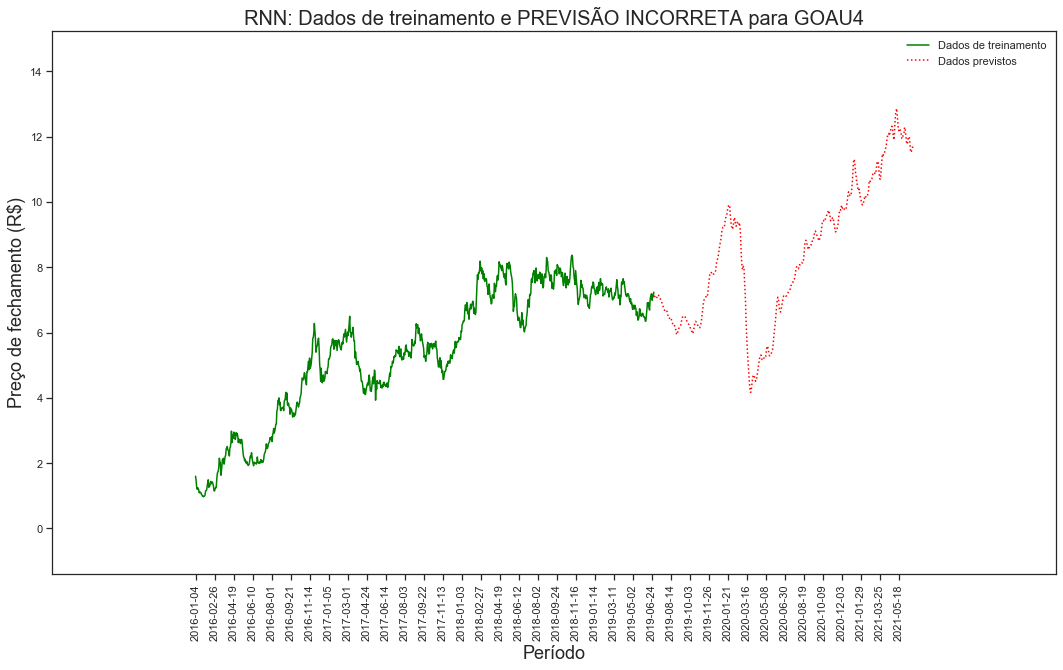

In [73]:
#Plotagem dos dados de treinamento, teste e previsão ERRADA  *************** <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
plt.figure(figsize=(18,10))

plt.plot(train_goau4_close.index, train_goau4_close, color='green', label = 'Dados de treinamento')
#plt.plot(test_goau4_close.index, test_goau4_close, color = 'blue', label = 'Dados de teste')
plt.plot(test_goau4_close.index, only_predictions_err, color = 'red', label = 'Dados previstos', linestyle=":")
plt.title('RNN: Dados de treinamento e PREVISÃO INCORRETA para GOAU4')
plt.xlabel('Período')
plt.ylabel('Preço de fechamento (R$)')
plt.legend()
#plt.grid(True)
#ax = plt.axes()   # Setting the background color
#ax.set_facecolor("white")
#plt.savefig('lstm1.pdf')

x_scale = train_goau4_close.index.append(test_goau4_close.index)
plt.xticks(x_scale[::36],  rotation='vertical')

# Add margins (padding) so that markers don't get clipped by the axes
plt.margins(0.2)
plt.show()


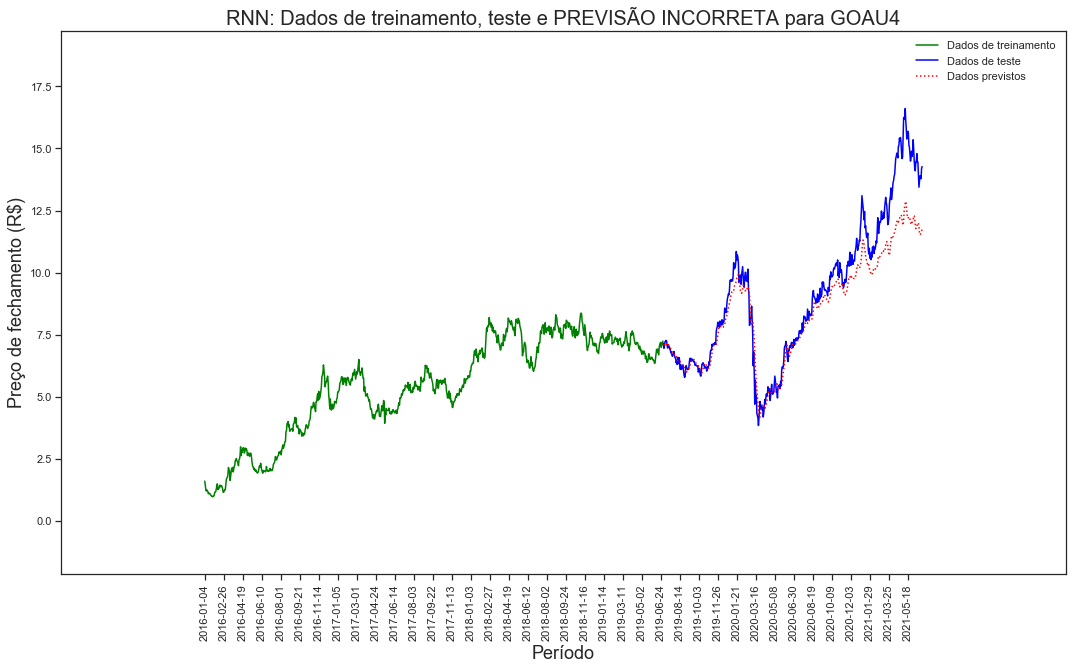

In [74]:
#Plotagem dos dados de treinamento, teste e previsão ERRADA  *************** <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
plt.figure(figsize=(18,10))

plt.plot(train_goau4_close.index, train_goau4_close, color='green', label = 'Dados de treinamento')
plt.plot(test_goau4_close.index, test_goau4_close, color = 'blue', label = 'Dados de teste')
plt.plot(test_goau4_close.index, only_predictions_err, color = 'red', label = 'Dados previstos', linestyle=":")
plt.title('RNN: Dados de treinamento, teste e PREVISÃO INCORRETA para GOAU4')
plt.xlabel('Período')
plt.ylabel('Preço de fechamento (R$)')
plt.legend()
#plt.grid(True)
#ax = plt.axes()   # Setting the background color
#ax.set_facecolor("white")
#plt.savefig('lstm1.pdf')

x_scale = train_goau4_close.index.append(test_goau4_close.index)
plt.xticks(x_scale[::36],  rotation='vertical')

# Add margins (padding) so that markers don't get clipped by the axes
plt.margins(0.2)
plt.show()

In [95]:
print('\nTimesteps=', timesteps)

# Cálculo das medidas de precisão: 
# Mean Squared Error: (MSE): 
MSE = mean_squared_error(test_goau4_close, only_predictions_err)
print(f'Test Mean Squared Error (MSE): %.3f' % MSE)

# Cálculo das medidas de precisão: Mean Absolute Error (MAE)
MAE = mean_absolute_error(test_goau4_close, only_predictions_err)
print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(test_goau4_close, only_predictions_err)/ test_goau4_close))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(test_goau4_close, only_predictions_err)/ test_goau4_close)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')


Timesteps= 20
Test Mean Squared Error (MSE): 1.298
Mean Absolute Error (MAE): 0.75
Mean Absolute Percentage Error (MAPE): Close    6.86
dtype: float64 %
Median Absolute Percentage Error (MDAPE): 5.29 %


In [121]:
print('\nTimesteps=', timesteps)

# Cálculo das medidas de precisão: 
# Mean Squared Error: (MSE): 
MSE = mean_squared_error(test_goau4_close, only_predictions_err)
print(f'Test Mean Squared Error (MSE): %.3f' % MSE)

# Cálculo das medidas de precisão: Mean Absolute Error (MAE)
MAE = mean_absolute_error(test_goau4_close, only_predictions_err)
print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(test_goau4_close, only_predictions_err)/ test_goau4_close))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(test_goau4_close, only_predictions_err)/ test_goau4_close)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')


Timesteps= 100
Test Mean Squared Error (MSE): 1.298
Mean Absolute Error (MAE): 0.75
Mean Absolute Percentage Error (MAPE): Close    6.86
dtype: float64 %
Median Absolute Percentage Error (MDAPE): 5.29 %


In [76]:
x_scale = test_goau4_close.index
#plt.xticks(x_scale[::22],  rotation='vertical')
x_scale

Index(['2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04', '2019-07-05',
       '2019-07-08', '2019-07-10', '2019-07-11', '2019-07-12', '2019-07-15',
       ...
       '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18',
       '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25'],
      dtype='object', name='Date', length=491)

In [77]:
print(len(only_predictions_err), len(test1_dataset_goau4.index))


predictions_err = pd.DataFrame(data = only_predictions_err, 
                        index = test1_dataset_goau4.index, 
                        columns = ["Prediction"])

491 491


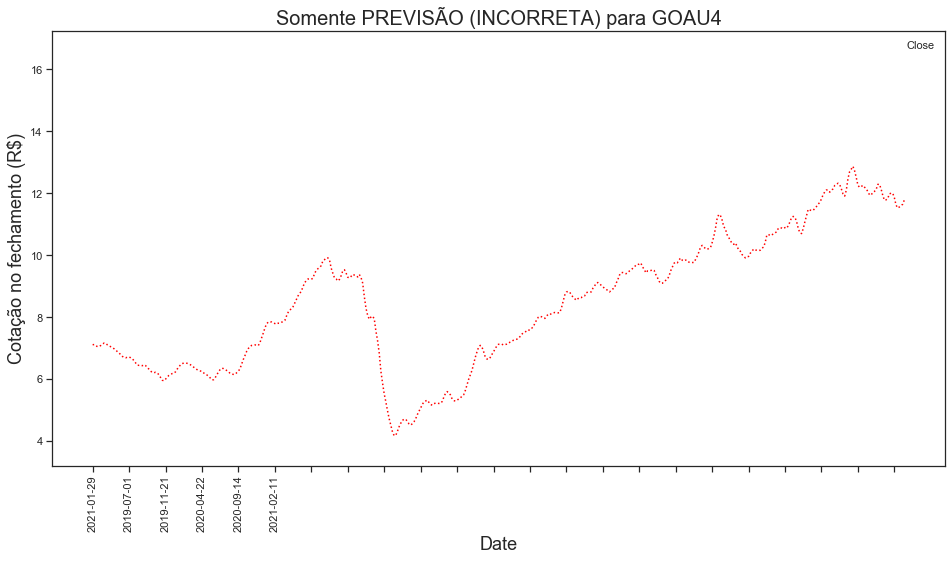

In [78]:
test_goau4_close.plot(figsize=(16,8), color = 'white', label = 'Dados de teste (observado)')
plt.plot(predictions_err.index, predictions_err, color = 'red', label = 'Dados previstos', linestyle=":")
#plt.legend()

x_scale = predictions_err.index
plt.xticks(x_scale[::22],  rotation='vertical')

plt.title('Somente PREVISÃO (INCORRETA) para GOAU4')
plt.ylabel('Cotação no fechamento (R$)')
plt.xlabel('Date')
pyplot.show()

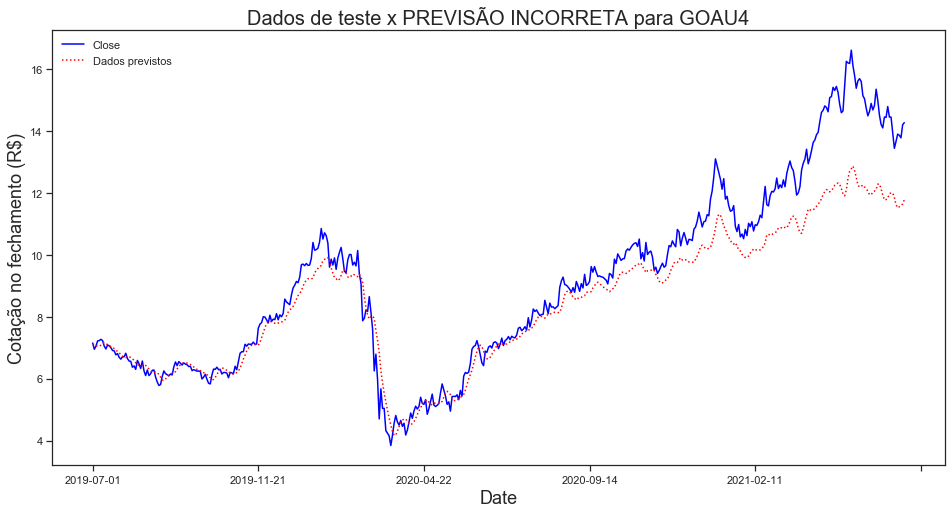

In [79]:
test_goau4_close.plot(figsize=(16,8), color = 'blue', label = 'Dados de teste (observado)')
plt.plot(test_goau4_close.index, only_predictions_err, color = 'red', label = 'Dados previstos', linestyle=":")
plt.legend()

plt.title('Dados de teste x PREVISÃO INCORRETA para GOAU4')
plt.ylabel('Cotação no fechamento (R$)')
plt.xlabel('Date')
pyplot.show()

In [134]:
#******************************************************************************************************************************
#******************** CORRIGINDO O MODO COMO AS PRECIÇÕES SÃO GERADAS: 
#******************** CONCATENAR O VALOR PREVISTO PELO MODELO AOS DADOS HISTÓRICOS, PARA GERAR A PRÓXIMA COTAÇÃO PREVISTA.
#******************** O DADO DE TESTE SERVE APENAS PARA COMPARAÇÃO E VALIDAÇÃO SE A PREVISÃO FOI BOA. 
#******************** CASO CONTRÁRIO, NUNCA SERÁ POSSÍVEL USAR O MODELO PARA PREDIZER VALORES EM DATAS FUTURAS, 
#******************** POIS AINDA NÃO TEREMOS OS DADOS DE "TESTE", QUE DO MODO COMO ESTAVA O CÓDIGO, 
#******************** ERAM NECESSÁRIOS PARA GERAR OS PROXIMOS VALORES.
#******************************************************************************************************************************

predictions_goau4_close = train_goau4_close.values
predictions_goau4_close = predictions_goau4_close.reshape(-1,1)
predictions_goau4_close = scaler.transform(predictions_goau4_close)
#print(min(predictions_goau4_lstm), max(predictions_goau4_lstm))


In [123]:
print('from ', timesteps, ' to ', train_goau4_close.shape[0]+timesteps-1, '(', train_goau4_close.shape[0],
      ' repetições do loop para geração de predição)')

from  100  to  968 ( 869  repetições do loop para geração de predição)


In [135]:
# ******** PREDIÇÃO SEM USAR OS DADOS DE TESTE !!!!!     ********
#for i in range(0, 2):     
for i in range(0, test_goau4_close.shape[0]):     
    t = predictions_goau4_close.shape[0]
    #if i > train_goau4_close.shape[0]+timesteps -10:
    #print(t-timesteps, ' a ', t-1, ':', predictions_goau4_close[t-timesteps:t-timesteps+3], '...', predictions_goau4_close[t-3:t])
    
    pred_close = np.array(predictions_goau4_close[t-timesteps:t])
    #print('>>>>>',i, t, ':\n', pred_close[-5:])
    pred_close = np.reshape(pred_close, (1, pred_close.shape[0], 1))
    next_predicted_value = model_rnn.predict(pred_close)
    #print(min(predictions_goau4_close), max(predictions_goau4_close), next_predicted_value[0])
    
    # Concatenando o VALOR PREDITO PELO MODELO, NÃO O DADO DE TESTE, para gerar a próxima predição
    predictions_goau4_close = np.append (predictions_goau4_close, next_predicted_value[0])    

In [125]:
predictions_goau4_close  # antes de desnormalizar
print(min(predictions_goau4_close), max(predictions_goau4_close))

0.0 0.9999999999999999


In [136]:
#x_test_lstm = np.array(x_test_lstm)
#x_test_lstm = np.reshape(x_test_lstm, (x_test_lstm.shape[0], x_test_lstm.shape[1], 1))
#predictions_goau4_lstm = model_rnn.predict(x_test_lstm)

# Desnormaliza os dados
predictions_goau4_close = scaler.inverse_transform(predictions_goau4_close.reshape(-1,1))

In [86]:
print(min(predictions_goau4_close), max(predictions_goau4_close))

[0.97] [8.37]


In [87]:
print(predictions_goau4_close.shape, len(predictions_goau4_close))

(1360, 1) 1360


In [88]:
print(predictions_goau4_close.shape, len(predictions_goau4_close))

(1360, 1) 1360


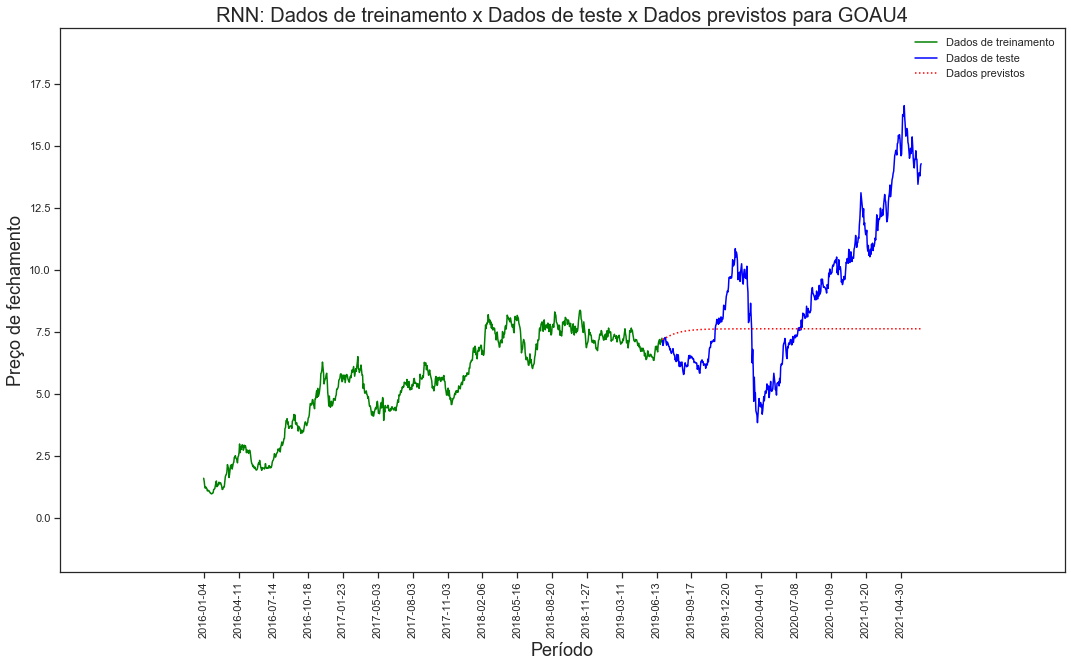

In [137]:
#Plotagem dos dados de treinamento, teste e previsão CORRETA
only_predictions = predictions_goau4_close[len(predictions_goau4_close)-len(test_goau4_close):]

plt.figure(figsize=(18,10))

plt.plot(train_goau4_close.index, train_goau4_close, color='green', label = 'Dados de treinamento')
plt.plot(test_goau4_close.index, test_goau4_close, color = 'blue', label = 'Dados de teste')
plt.plot(test_goau4_close.index, only_predictions, color = 'red', label = 'Dados previstos', linestyle=":")
plt.title('RNN: Dados de treinamento x Dados de teste x Dados previstos para GOAU4')
plt.xlabel('Período')
plt.ylabel('Preço de fechamento')
plt.legend()

x_scale = train_goau4_close.index.append(test_goau4_close.index)

plt.xticks(x_scale[::66],  rotation='vertical')

# Add margins (padding) so that markers don't get clipped by the axes
plt.margins(0.2)
plt.show()

In [138]:
print('\nTimesteps=', timesteps)

# Cálculo das medidas de precisão: 
# Mean Squared Error: (MSE): 
MSE = mean_squared_error(test_goau4_close, only_predictions)
print(f'Test Mean Squared Error (MSE): %.3f' % MSE)

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(test_goau4_close, only_predictions)
print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(test_goau4_close, only_predictions)/ test_goau4_close))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(test_goau4_close, only_predictions)/ test_goau4_close)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')


Timesteps= 20
Test Mean Squared Error (MSE): 10.907
Mean Absolute Error (MAE): 2.55
Mean Absolute Percentage Error (MAPE): Close    26.38
dtype: float64 %
Median Absolute Percentage Error (MDAPE): 23.26 %


In [94]:
print('\nTimesteps=', timesteps)

# Cálculo das medidas de precisão: 
# Mean Squared Error: (MSE): 
MSE = mean_squared_error(test_goau4_close, only_predictions)
print(f'Test Mean Squared Error (MSE): %.3f' % MSE)

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(test_goau4_close, only_predictions)
print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(test_goau4_close, only_predictions)/ test_goau4_close))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(test_goau4_close, only_predictions)/ test_goau4_close)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')


Timesteps= 20
Test Mean Squared Error (MSE): 14.983
Mean Absolute Error (MAE): 2.93
Mean Absolute Percentage Error (MAPE): Close    28.04
dtype: float64 %
Median Absolute Percentage Error (MDAPE): 29.51 %


In [94]:
print('\nTimesteps=', timesteps)

# Cálculo das medidas de precisão: 
# Mean Squared Error: (MSE): 
MSE = mean_squared_error(test_goau4_close, only_predictions)
print(f'Test Mean Squared Error (MSE): %.3f' % MSE)

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(test_goau4_close, only_predictions)
print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(test_goau4_close, only_predictions)/ test_goau4_close))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(test_goau4_close, only_predictions)/ test_goau4_close)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')


Timesteps= 20
Test Mean Squared Error (MSE): 14.983
Mean Absolute Error (MAE): 2.93
Mean Absolute Percentage Error (MAPE): Close    28.04
dtype: float64 %
Median Absolute Percentage Error (MDAPE): 29.51 %
